199999


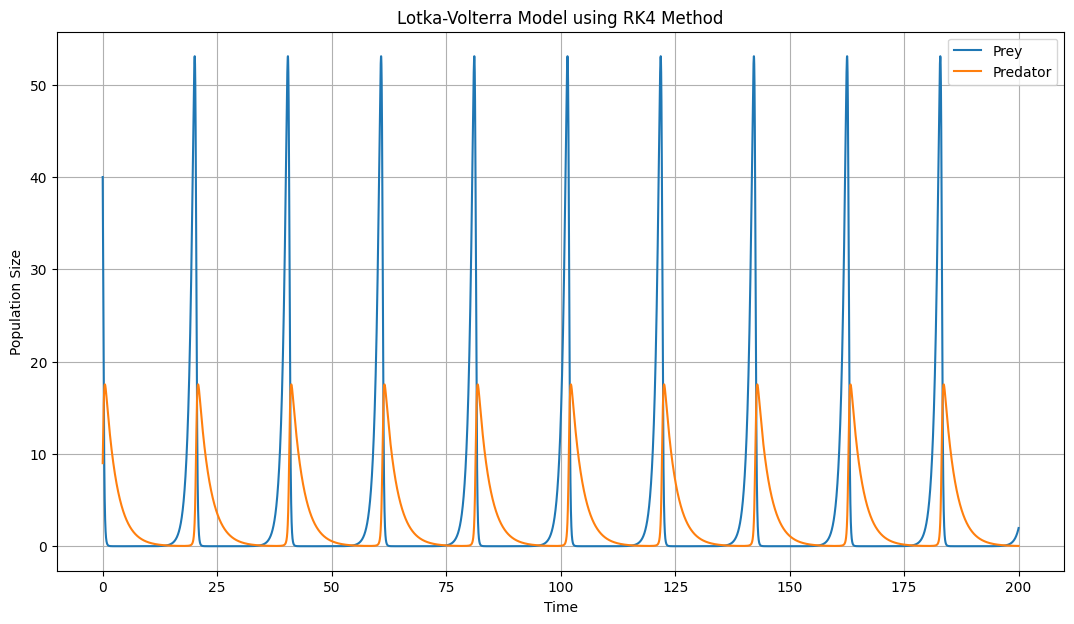

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def LVmodel(z, t, a, b, c, d):
    x, y = z
    dx_dt = a*x - b*x*y
    dy_dt = c*x*y - d*y
    return np.array([dx_dt, dy_dt])

# Set the parameters and initial conditions
a, b, c, d = 1.1, 0.4, 0.1, 0.4
z0 = np.array([40, 9])
t = np.arange(0, 200, 0.001)
h=0.001

# Initialize the solution array
z = np.zeros((len(t), 2))
z[0] = z0

# Solve the system of equations using the RK4 method
for i in range(len(t) - 1):
    k1 = h * LVmodel(z[i], t[i], a, b, c, d)
    k2 = h * LVmodel(z[i] + 0.5*k1, t[i] + 0.5*h, a, b, c, d)
    k3 = h * LVmodel(z[i] + 0.5*k2, t[i] + 0.5*h, a, b, c, d)
    k4 = h * LVmodel(z[i] + k3, t[i] + h, a, b, c, d)
    z[i + 1] = z[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

print(len(t)-1)

plt.figure(figsize=(13, 7))
plt.plot(t, z[:, 0], label='Prey')
plt.plot(t, z[:, 1], label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Lotka-Volterra Model using RK4 Method')
plt.grid(True)
plt.show()


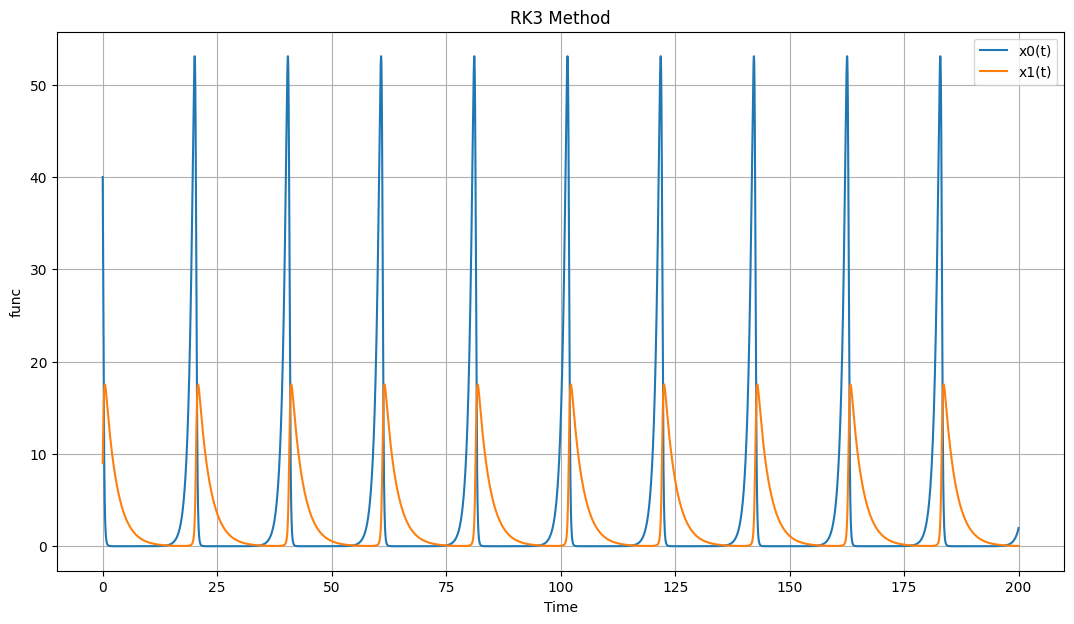

(array([[4.00000000e+01, 9.00000000e+00],
        [3.98998663e+01, 9.03241319e+00],
        [3.97994670e+01, 9.06485222e+00],
        ...,
        [1.96653997e+00, 3.25241965e-02],
        [1.96867875e+00, 3.25175870e-02],
        [1.97081985e+00, 3.25109857e-02]]),
 None)

In [2]:
def rk3(f, x0, t):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        k1 = h * f(x[i], t[i])
        k2 = h * f(x[i] + k1/2, t[i] + h/2)
        k3 = h * f(x[i] - k1 + 2 * k2, t[i] + h)
        x[i+1] = x[i] + (k1 + 4 * k2 + k3) / 6

    if len(x0) >= 3:
        fig = plt.figure(figsize=(14,17))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x[:, 0], x[:, 1], x[:, 2], lw=0.5)
        ax.set_xlabel("X-Axis")
        ax.set_ylabel("Y-Axis")
        ax.set_zlabel("Z-Axis")
        ax.set_title("Lorenz Attractor by RK4")
        plt.show()

    else:
        plt.figure(figsize=(13, 7))
        for i in range(len(x0)):
            plt.plot(t, x[:, i], label=f'x{i}(t)')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('func')
        plt.title('RK3 Method')
        plt.grid(True)
        plt.show()
    
    return x, plt.show()

def LVmodel(x, t):
    x, y = x
    dx_dt = 1.1*x - 0.4*x*y
    dy_dt = 0.1*x*y - 0.4*y
    return np.array([dx_dt, dy_dt])

x0 = np.array([40, 9])
t = np.arange(0, 200, 0.001)
h=0.001

rk3(LVmodel, x0, t)

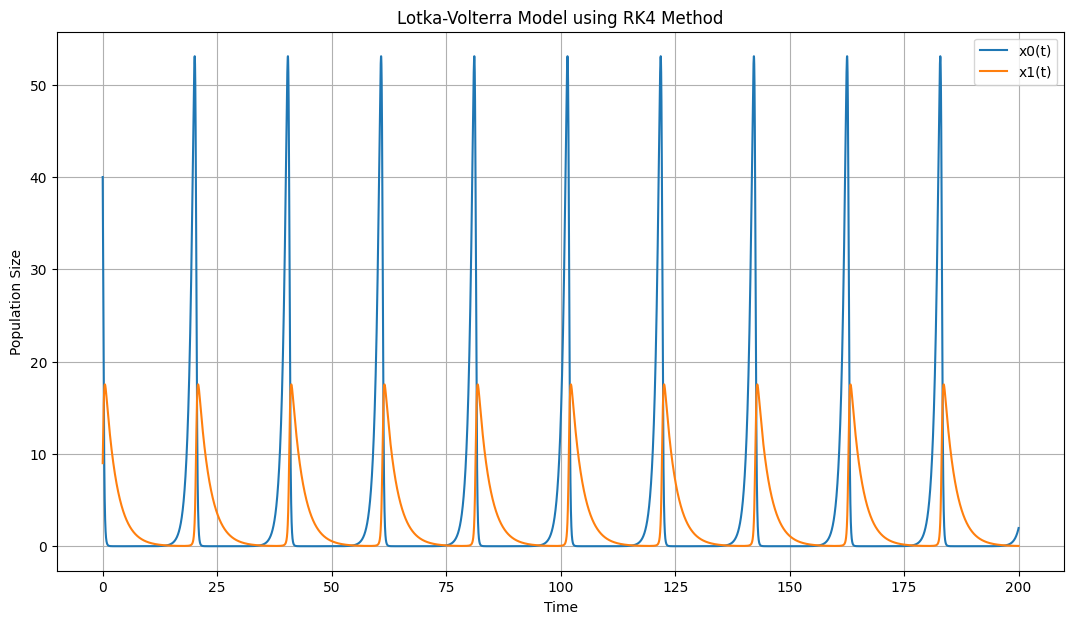

(array([[4.00000000e+01, 9.00000000e+00],
        [3.98998663e+01, 9.03241319e+00],
        [3.97994670e+01, 9.06485222e+00],
        ...,
        [1.96654877e+00, 3.25241780e-02],
        [1.96868755e+00, 3.25175685e-02],
        [1.97082867e+00, 3.25109673e-02]]),
 None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rk4(f, x0, t):
    """
    Solve a system of ODEs using the RK4 method.

    Parameters:
    f : function
        The function that defines the system of ODEs.
    x0 : numpy array
        The initial conditions.
    t : numpy array
        The time points where the solution should be computed.

    Returns:
    x : 2D numpy array
        The approximate solution at the time points in t.
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(x[i], t[i])
        k2 = h * f(x[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(x[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(x[i] + k3, t[i] + h)
        x[i+1] = x[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    if len(x0) >= 3:
        fig = plt.figure(figsize=(14,17))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x[:, 0], x[:, 1], x[:, 2], lw=0.5)
        ax.set_xlabel("X-Axis")
        ax.set_ylabel("Y-Axis")
        ax.set_zlabel("Z-Axis")
        ax.set_title("Lorenz Attractor by RK4")
        plt.show()

    else:
        plt.figure(figsize=(13, 7))
        for i in range(len(x0)):
            plt.plot(t, x[:, i], label=f'x{i}(t)')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Population Size')
        plt.title('Lotka-Volterra Model using RK4 Method')
        plt.grid(True)
        plt.show()
    
    return x, plt.show()

def LVmodel(x, t):
    x, y = x
    dx_dt = 1.1*x - 0.4*x*y
    dy_dt = 0.1*x*y - 0.4*y
    return np.array([dx_dt, dy_dt])

x0 = np.array([40, 9])
t = np.arange(0, 200, 0.001)
h=0.001

rk4(LVmodel, x0, t)

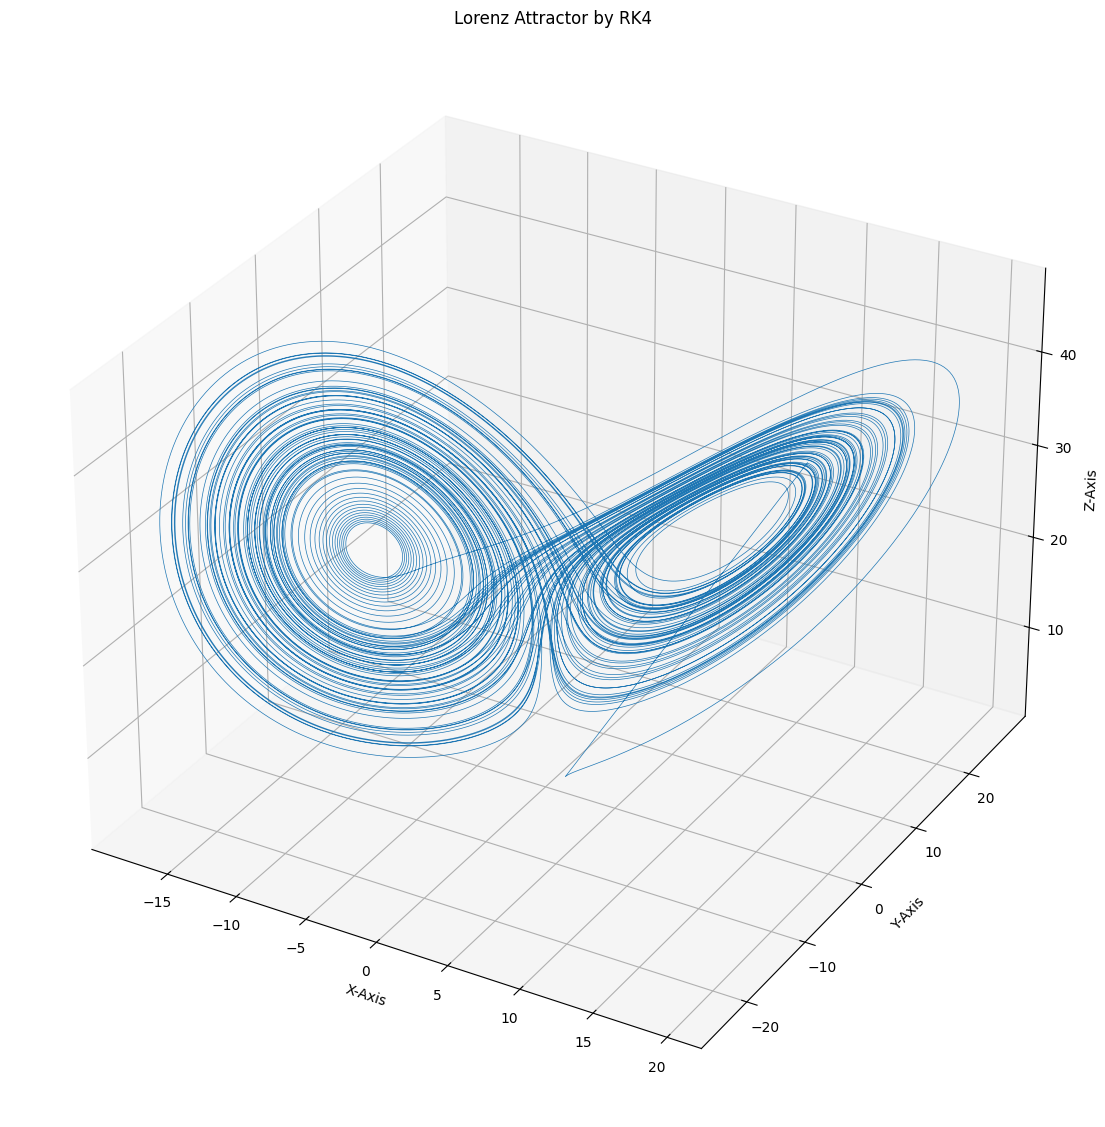

In [1]:
#Lorentz attractor

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x, y, z = 1, 1, 1

def chaos(x, y, z, t, a, b, c):
    dx_dt = a * ( y - x )
    dy_dt = x * (c - z) - y
    dz_dt = x * y - b * z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0,100,0.001)
h=0.001

xlist = []
ylist = []
zlist = []

a=10 
b=8/3
c=28

# Solve the system of equations using the RK4 method
for i in range(len(t)):
    kx1, ky1, kz1 = h * chaos(x, y, z, t[i], a, b, c)
    kx2, ky2, kz2 = h * chaos(x + 0.5 * kx1, y + 0.5 * ky1, z + 0.5 * kz1, t[i] + 0.5 * h, a, b, c)
    kx3, ky3, kz3 = h * chaos(x + 0.5 * kx2, y + 0.5 * ky2, z + 0.5 * kz2, t[i] + 0.5 * h, a, b, c)
    kx4, ky4, kz4 = h * chaos(x + kx3, y + ky3, z + kz3, t[i] + h, a, b, c)
    x += (kx1 + 2 * (kx2 + kx3) + kx4) / 6
    y += (ky1 + 2 * (ky2 + ky3) + ky4) / 6
    z += (kz1 + 2 * (kz2 + kz3) + kz4) / 6
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)


# Convert lists to numpy arrays for plotting
xlist = np.array(xlist) 
ylist = np.array(ylist)
zlist = np.array(zlist)

xlist[0],ylist[0],zlist[0] = x, y, z #initial conditions


# Create a 3D plot
fig = plt.figure(figsize=(14,17))
ax = fig.add_subplot(111, projection='3d')



ax.plot(xlist, ylist, zlist, lw=0.5)
ax.set_xlabel("X-Axis")
ax.set_ylabel("Y-Axis")
ax.set_zlabel("Z-Axis")
ax.set_title("Lorenz Attractor by RK4")

plt.savefig('chaos.jpg')
plt.show()



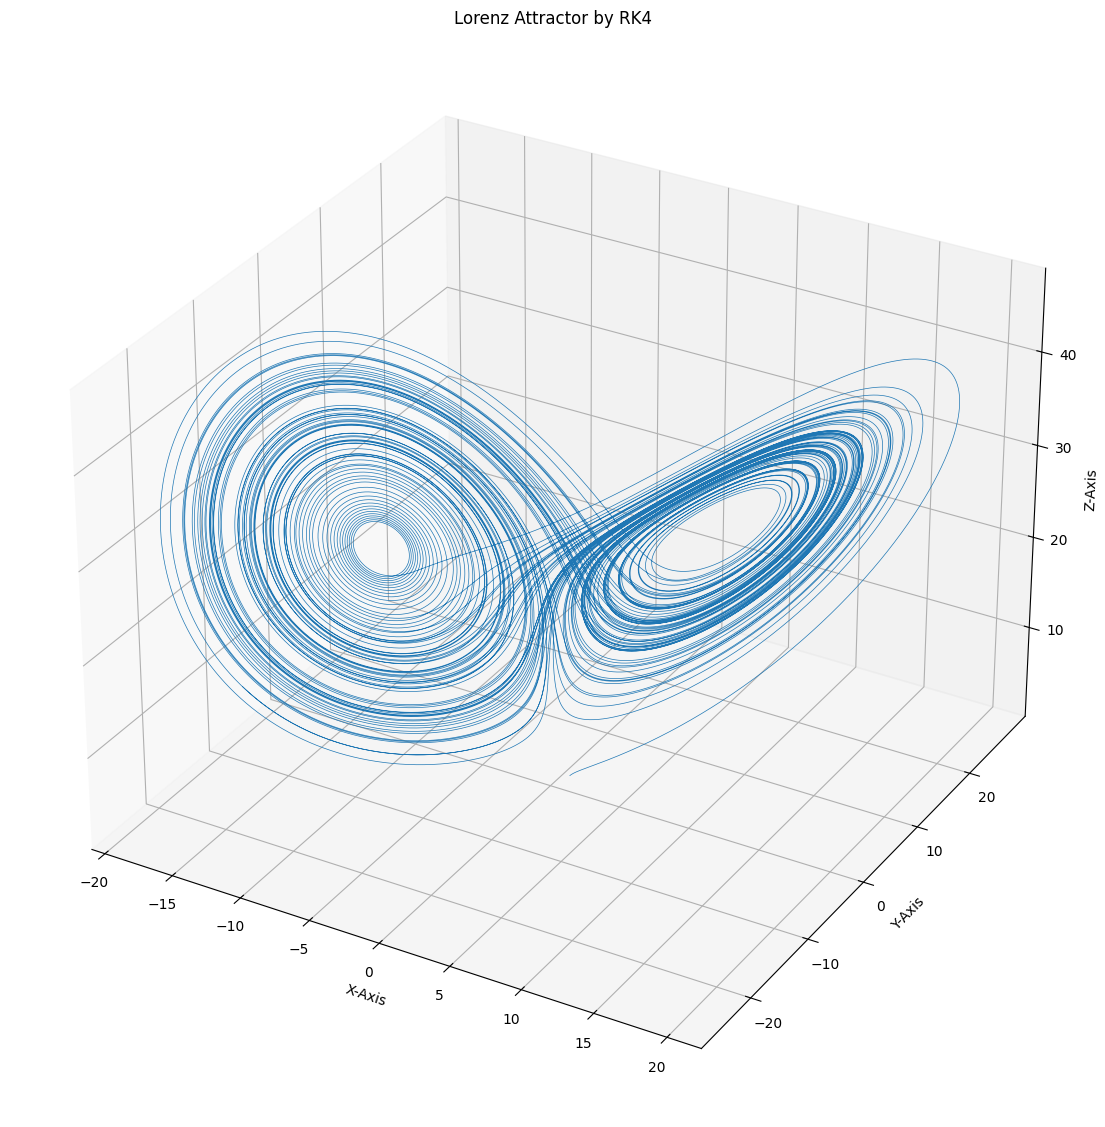

(array([[  1.        ,   1.        ,   1.        ],
        [  1.0000013 ,   1.00259988,   0.99983349],
        [  1.0000052 ,   1.00519952,   0.99966728],
        ...,
        [-12.44672906, -21.93996999,  17.9628515 ],
        [-12.4562227 , -21.95025919,  17.98538332],
        [-12.46571712, -21.96052877,  18.00794276]]),
 None)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rk4(f, x0, t):
    """
    Solve a system of ODEs using the RK4 method.

    Parameters:
    f : function
        The function that defines the system of ODEs.
    x0 : numpy array
        The initial conditions.
    t : numpy array
        The time points where the solution should be computed.

    Returns:
    x : 2D numpy array
        The approximate solution at the time points in t.
    """
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = x0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = h * f(x[i], t[i])
        k2 = h * f(x[i] + 0.5 * k1, t[i] + 0.5 * h)
        k3 = h * f(x[i] + 0.5 * k2, t[i] + 0.5 * h)
        k4 = h * f(x[i] + k3, t[i] + h)
        x[i+1] = x[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    if len(x0) >= 3:
        fig = plt.figure(figsize=(14,17))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(x[:, 0], x[:, 1], x[:, 2], lw=0.5)
        ax.set_xlabel("X-Axis")
        ax.set_ylabel("Y-Axis")
        ax.set_zlabel("Z-Axis")
        ax.set_title("Lorenz Attractor by RK4")
        plt.show()

    else:
        plt.figure(figsize=(13, 7))
        for i in range(len(x0)):
            plt.plot(t, x[:, i], label=f'x{i}(t)')
        plt.legend()
        plt.xlabel('Time')
        plt.ylabel('Population Size')
        plt.title('Lotka-Volterra Model using RK4 Method')
        plt.grid(True)
        plt.show()
    
    return x, plt.show()

def chaos(x, t):
    x, y, z = x
    dx_dt = 10 * ( y - x )
    dy_dt = x * (28 - z) - y
    dz_dt = x * y - 8/3 * z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0,100,0.0001)
h=0.0001

x0 = [1,1,1]

rk4(chaos, x0, t)

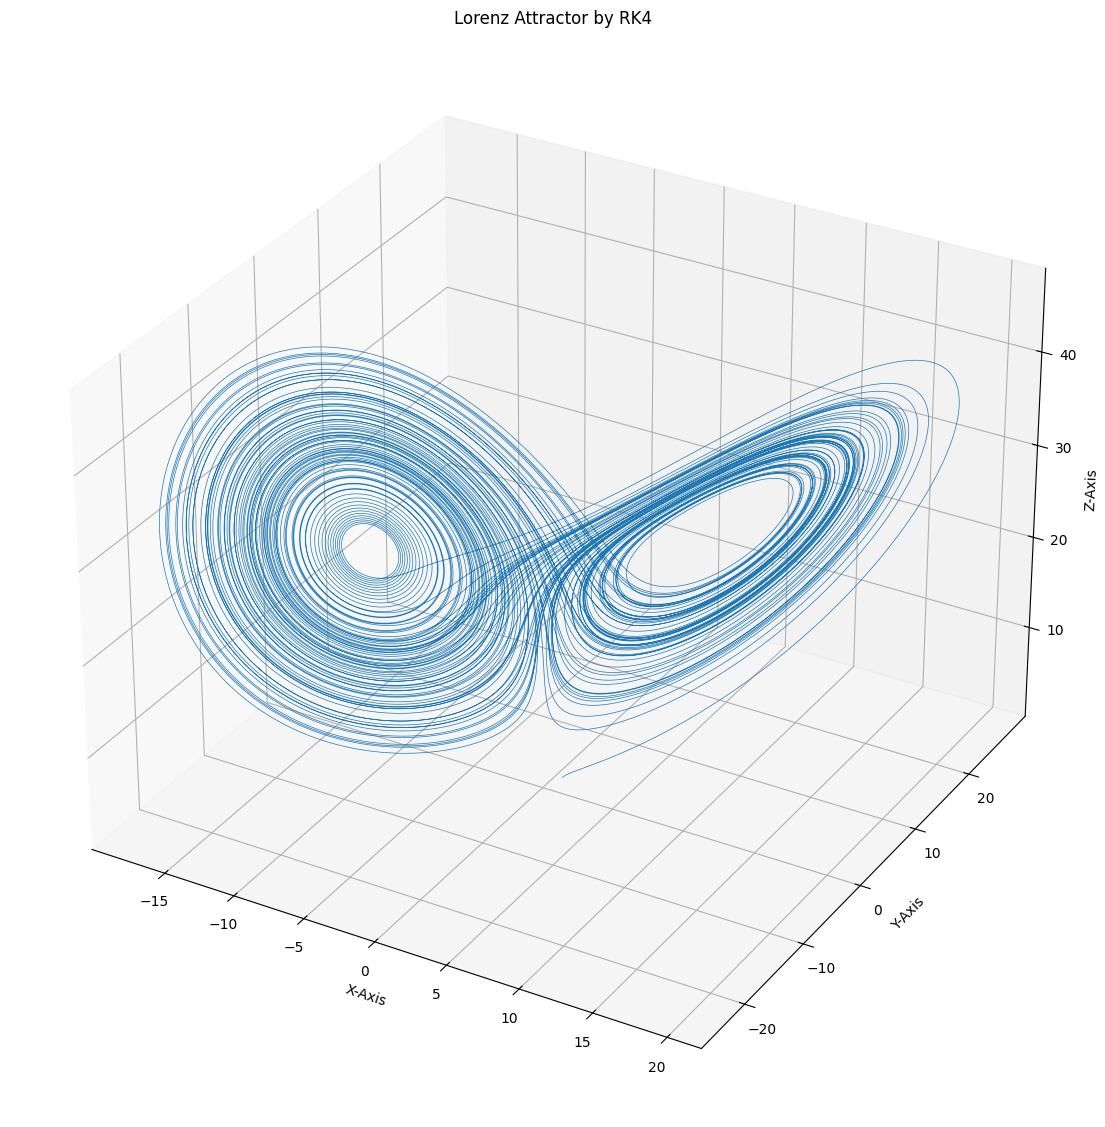

(array([[ 1.        ,  1.        ,  1.        ],
        [ 1.0000013 ,  1.00259988,  0.99983349],
        [ 1.0000052 ,  1.00519952,  0.99966728],
        ...,
        [ 0.78127501, -0.25567745, 20.67361378],
        [ 0.78023888, -0.25507968, 20.66808161],
        [ 0.77920437, -0.2544823 , 20.662551  ]]),
 None)

In [3]:
def chaos(x, t):
    x, y, z = x
    dx_dt = 10 * ( y - x )
    dy_dt = x * (28 - z) - y
    dz_dt = x * y - 8/3 * z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0,100,0.0001)
h=0.0001

x0 = [1,1,1]

rk3(chaos, x0, t)

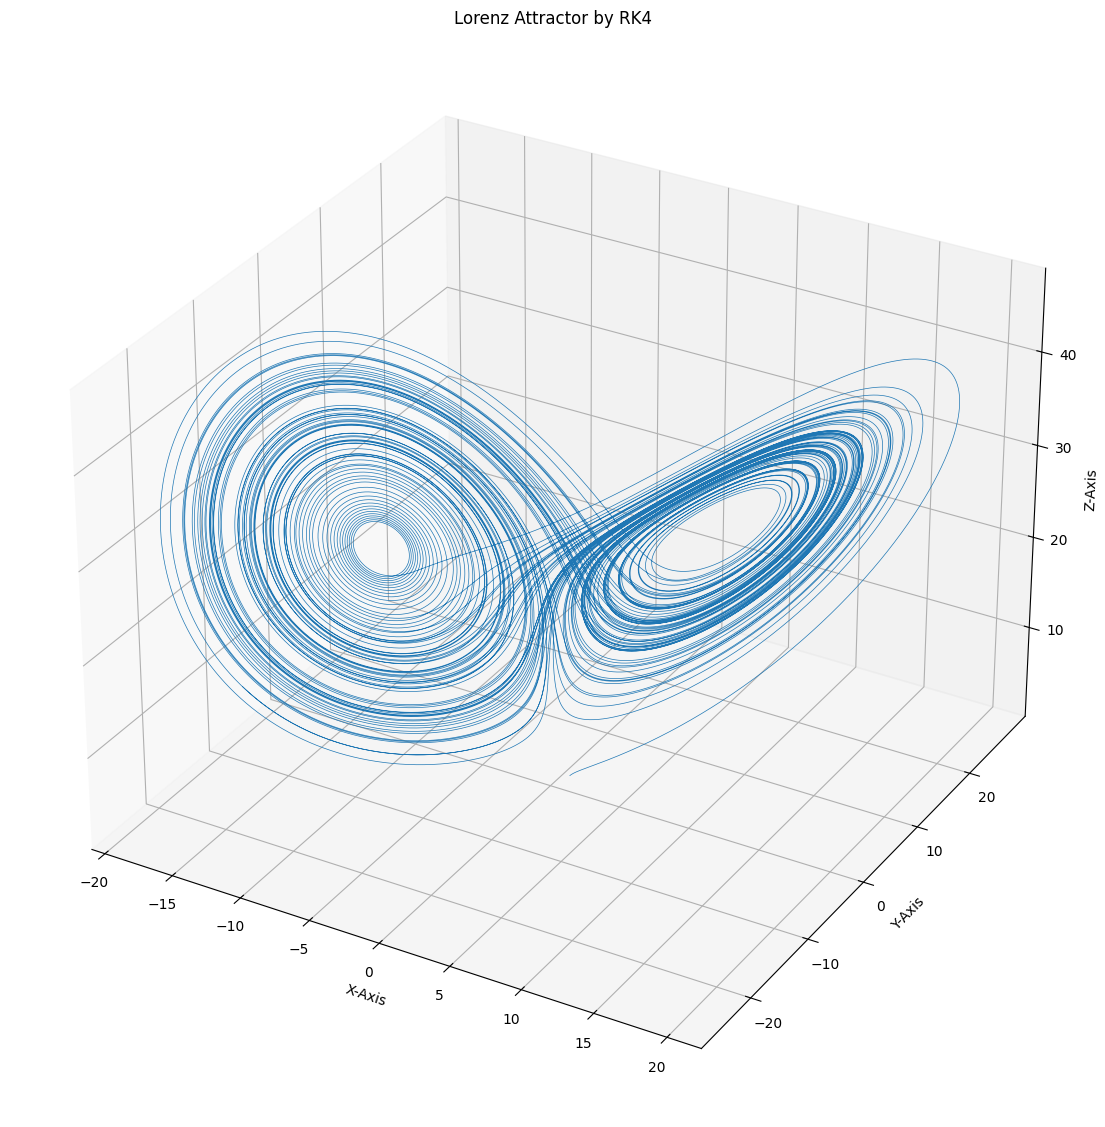

(array([[  1.        ,   1.        ,   1.        ],
        [  1.0000013 ,   1.00259988,   0.99983349],
        [  1.0000052 ,   1.00519952,   0.99966728],
        ...,
        [-12.44672906, -21.93996999,  17.9628515 ],
        [-12.4562227 , -21.95025919,  17.98538332],
        [-12.46571712, -21.96052877,  18.00794276]]),
 None)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Prithwiraj as Pr

def chaos(x, t):
    x, y, z = x
    dx_dt = 10 * ( y - x )
    dy_dt = x * (28 - z) - y
    dz_dt = x * y - 8/3 * z
    return np.array([dx_dt, dy_dt, dz_dt])

t = np.arange(0,100,0.0001)
h=0.0001

x0 = [1,1,1]

Pr.rk4(chaos, x0, t, h)